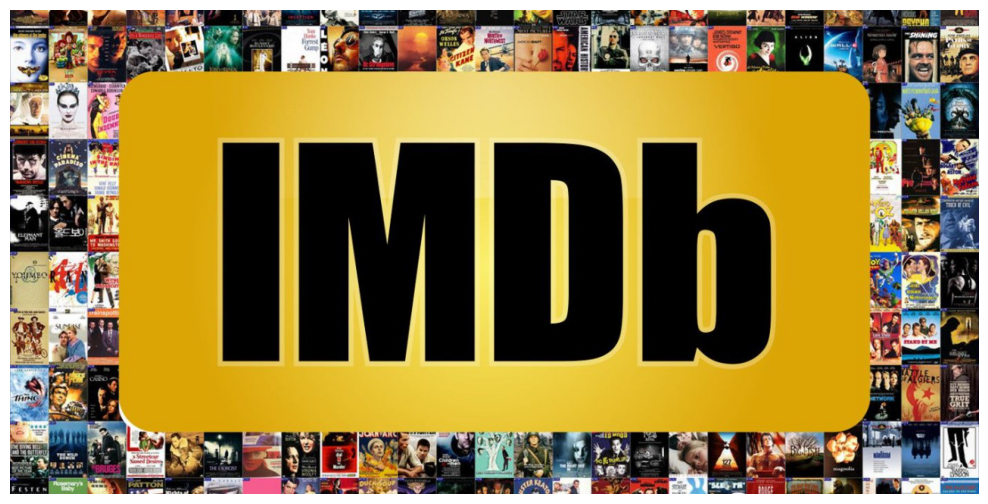

In [1]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# ID do arquivo no Google Drive
file_id = '19qRlKImhcjl-EcGqEQXf-OKU5Z3vwOFP'

# URL de download direto
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Fazer o download da imagem
response = requests.get(download_url)
img = Image.open(BytesIO(response.content))

# Ajustar o tamanho da figura
plt.figure(figsize=(12.5, 20))  # Aqui você pode ajustar o tamanho conforme necessário

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Desativar os eixos
plt.show()

# <center><font color="#F3CD05"> Case Python - Análises dos dados do IMDB </font>
# <center> Jump Start 

## Descrição do projeto
----

**Introdução aos Dados do IMDb**

Os dados do IMDb (Internet Movie Database) constituem uma vasta coleção de informações abrangentes sobre filmes, programas de televisão, profissionais do setor cinematográfico e televisivo, incluindo atores, diretores e equipes de produção.   

Como uma das maiores e mais influentes bases de dados online relacionadas ao entretenimento, o IMDb oferece uma rica fonte de dados para análises profundas e insights valiosos sobre a indústria cinematográfica e televisiva global.

Ao explorar os dados do IMDb, foram realizadas diversas análises para fornecer uma visão abrangente e detalhada do panorama cinematográfico e televisivo. Abaixo estão algumas das perguntas respondidas e análises realizadas:

1. **Categorias de Filmes Mais Comuns**: Identificação das categorias de filmes mais frequentes no IMDb.

2. **Número de Títulos por Gênero**: Análise quantitativa dos títulos de filmes por gênero.

3. **Mediana de Avaliação por Gênero**: Avaliação da mediana das classificações dos filmes agrupados por gênero.

4. **Mediana de Avaliação por Ano de Estreia**: Análise da mediana das avaliações dos filmes em relação aos anos de lançamento.

5. **Número de Filmes Avaliados por Gênero e Ano de Estreia**: Quantificação dos filmes avaliados por gênero ao longo dos anos.

6. **Filme com Maior Duração**: Identificação do filme com a maior duração e cálculo dos percentis relacionados à duração dos filmes.

7. **Relação entre Duração e Gênero**: Análise da relação entre a duração dos filmes e seus respectivos gêneros.

8. **Relação entre Orçamento e Avaliação dos Filmes**: Investigação da relação entre o orçamento de produção dos filmes e suas avaliações.

9. **Número de Filmes Produzidos por País**: Quantificação dos filmes produzidos por país.

10. **Top 15 Melhores e Piores Filmes**: Identificação dos 15 melhores e 15 piores filmes com base nas avaliações.

11. **Gêneros Mais Populares por Década**: Análise dos gêneros mais populares em cada década.

**Conclusão**

Essas análises proporcionam insights estratégicos fundamentais para investidores e profissionais do setor cinematográfico e televisivo, destacando tendências, preferências de público e áreas potenciais de oportunidade no mercado de entretenimento. A utilização de técnicas avançadas de análise de dados e visualização, aliadas ao poder do Python, permitiu uma exploração detalhada e uma compreensão aprofundada dos dados do IMDb.

Os arquivos do conjunto de dados podem ser acessados ​​e baixados de https://datasets.imdbws.com/ . 
Os dados são atualizados diariamente.

## BIBLIOTECAS E DADOS:
--------


#### IMPORTAÇÃO DAS BIBLIOTECAS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

#### IMPORTAÇÃO DOS DADOS


In [3]:
def carregar_exibir_arquivo(caminho_arquivo):
    # Carregar o arquivo TSV compactado
    df = pd.read_csv(caminho_arquivo, compression='gzip', delimiter='\t', encoding='utf-8', low_memory=False)
    
    # Substituir '\N' por NaN
    df.replace('\\N', pd.NA, inplace=True)
    
    return df

# Lista de caminhos dos arquivos
arquivos = [
    "title.basics.tsv.gz",
    "title.ratings.tsv.gz",   
]

# Dicionário para armazenar os DataFrames
dataframes = {}

# Carregar e exibir cada arquivo
for arquivo in arquivos:
    df = carregar_exibir_arquivo(arquivo)
    nome_df = arquivo.split('/')[-1].replace('.tsv.gz', '').replace('.', '_')
    dataframes[nome_df] = df

# Para ver o nome dos DataFrames carregados
for nome, df in dataframes.items():
    print(f"DataFrame name: {nome}")
    display(df.head())


DataFrame name: title_basics


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short"


DataFrame name: title_ratings


,tconst,averageRating,numVotes
0,tt0000001,5.70,2063
1,tt0000002,5.60,279
2,tt0000003,6.50,2030
3,tt0000004,5.40,180
4,tt0000005,6.20,2796


#### DICIONÁRIO DE DADOS

**título.akas.tsv.gz:**
- `titleId` (string) - um tconst, um identificador alfanumérico exclusivo do título
- `ordenação` (inteiro) – um número para identificar exclusivamente as linhas para um determinado titleId
- `título` (string) – o título localizado
- `região` (string) - a região para esta versão do título
- `idioma` (string) - o idioma do título
- `tipos` (matriz) - Conjunto enumerado de atributos para este título alternativo. Um ou mais dos seguintes: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". Novos valores podem ser adicionados no futuro sem aviso
- `atributos` (matriz) - Termos adicionais para descrever este título alternativo, não enumerados
- `isOriginalTitle` (boolean) – 0: título não original; 1: título original

**título.básico.tsv.gz:**
- `tconst` (string) - identificador alfanumérico exclusivo do título
- `titleType` (string) – o tipo/formato do título (por exemplo, filme, curta, série de TV, episódio de TV, vídeo, etc.)
- `primaryTitle` (string) – o título mais popular / o título usado pelos cineastas em materiais promocionais no momento do lançamento
- `originalTitle` (string) - título original, no idioma original
- `isAdult` (boolean) - 0: título não adulto; 1: título adulto
- `startYear` (YYYY) – representa o ano de lançamento de um título. No caso de séries de TV, é o ano de início da série
- `endYear` (YYYY) – Ano final da série de TV. '\N' para todos os outros tipos de títulos
- `runtimeMinutes` – tempo de execução principal do título, em minutos
- `gêneros` (matriz de strings) – inclui até três gêneros associados ao título


**título.classificações.tsv.gz:**
- `tconst` (string) - identificador alfanumérico exclusivo do título
- `averageRating` – média ponderada de todas as avaliações individuais dos usuários
- `numVotes` - número de votos que o título recebeu


### TRATAMENTO DAS COLUNAS

- #### df_basics

In [4]:
df_basics = dataframes["title_basics"]

In [5]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10913680 entries, 0 to 10913679
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 749.4+ MB


In [6]:
# Exclusão das colunas que não serão usadas:
colunas_para_excluir = ['isAdult', 'endYear']
df_basics.drop(columns=colunas_para_excluir, inplace=True)

In [7]:
# Renomeando as colunas para PT:
new_column_names = {
    'tconst': 'id_titulo',
    'titleType': 'categoria',
    'primaryTitle': 'titulo_principal',
    'originalTitle': 'titulo_original',
    'startYear': 'ano',
    'runtimeMinutes': 'duracao_minutos',
    'genres': 'generos'
}

df_basics.rename(columns=new_column_names, inplace=True)


#transformando a coluna de object para float
df_basics['duracao_minutos'] = pd.to_numeric(df_basics['duracao_minutos'], errors='coerce')

#transformando a coluna de object para inteiro
df_basics['ano'] = pd.to_numeric(df_basics['ano'], errors='coerce').astype('Int64')

# O parâmetro errors='coerce' garante que qualquer valor que não possa ser convertido seja definido como NaN.

In [8]:
df_basics.describe()

,ano,duracao_minutos
count,"9,498,797.00","3,393,563.00"
mean,"2,005.89",43.59
std,20.04,75.14
min,"1,874.00",0.00
25%,"2,001.00",19.00
50%,"2,013.00",30.00
75%,"2,019.00",60.00
max,"2,031.00","59,460.00"


In [9]:
display(df_basics.describe(include='object'))

,id_titulo,categoria,titulo_principal,titulo_original,generos
count,10913680,10913680,10913662,10913662,10428470
unique,10913680,11,4911050,4934839,2374
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,Drama
freq,1,8361788,52258,52258,1246096


In [10]:
#verificando os tipos de título que estão na coluna: tipo_titulo
valores_unicos_tipo_titulo1 = df_basics.copy()
valores_unicos_tipo_titulo = df_basics['categoria'].unique()
valores_unicos_tipo_titulo

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [11]:
#filtrando para deixar apenas o necessário para a análise
df_basics = df_basics[df_basics['categoria']=='movie']


In [12]:
#retirando os valores de filmes que ainda não estreiaram
df_basics = df_basics[df_basics['ano'] <= 2024]

In [13]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585044 entries, 8 to 10913630
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_titulo         585044 non-null  object 
 1   categoria         585044 non-null  object 
 2   titulo_principal  585042 non-null  object 
 3   titulo_original   585042 non-null  object 
 4   ano               585044 non-null  Int64  
 5   duracao_minutos   423655 non-null  float64
 6   generos           516150 non-null  object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 36.3+ MB


- #### df_ratings

In [14]:
df_ratings = dataframes["title_ratings"]

In [15]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453791 entries, 0 to 1453790
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1453791 non-null  object 
 1   averageRating  1453791 non-null  float64
 2   numVotes       1453791 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [16]:
new_column_names = {
    'tconst': 'id_titulo',
    'averageRating': 'media_avaliacoes',
    'numVotes': 'num_votos',
    }

# Renomear as colunas do DataFrame
df_ratings.rename(columns=new_column_names, inplace=True)

#### JUNÇÃO DAS COLUNAS:
df_basics + df_ratins

In [17]:
df_filmes = pd.merge(df_basics, df_ratings, on="id_titulo", how="inner")

In [18]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312857 entries, 0 to 312856
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_titulo         312857 non-null  object 
 1   categoria         312857 non-null  object 
 2   titulo_principal  312857 non-null  object 
 3   titulo_original   312857 non-null  object 
 4   ano               312857 non-null  Int64  
 5   duracao_minutos   281817 non-null  float64
 6   generos           302723 non-null  object 
 7   media_avaliacoes  312857 non-null  float64
 8   num_votos         312857 non-null  int64  
dtypes: Int64(1), float64(2), int64(1), object(5)
memory usage: 21.8+ MB


In [19]:
df_filmes.isnull().sum()

id_titulo               0
categoria               0
titulo_principal        0
titulo_original         0
ano                     0
duracao_minutos     31040
generos             10134
media_avaliacoes        0
num_votos               0
dtype: int64

In [20]:
df_filmes.describe()

,ano,duracao_minutos,media_avaliacoes,num_votos
count,"312,857.00","281,817.00","312,857.00","312,857.00"
mean,"1,995.61",94.27,6.17,"3,627.43"
std,26.14,135.07,1.36,"36,225.50"
min,"1,894.00",1.00,1.00,5.00
25%,"1,980.00",80.00,5.30,19.00
50%,"2,006.00",91.00,6.30,61.00
75%,"2,016.00",103.00,7.10,314.00
max,"2,024.00","51,420.00",10.00,"2,912,371.00"


## ANÁLISE EXPLORATÓRIA DOS DADOS (AED) E VISUALIZAÇÃO
______________________________________

- <strong>Categorias de Filmes Mais Comuns:</strong> Identificação das categorias de filmes mais frequentes no IMDb.

In [21]:
contagem_por_categoria = valores_unicos_tipo_titulo1['categoria'].value_counts()
contagem_por_categoria


categoria
tvEpisode       8361788
short           1003931
movie            685654
video            294636
tvSeries         266314
tvMovie          148086
tvMiniSeries      55398
tvSpecial         48300
videoGame         39221
tvShort           10351
tvPilot               1
Name: count, dtype: int64

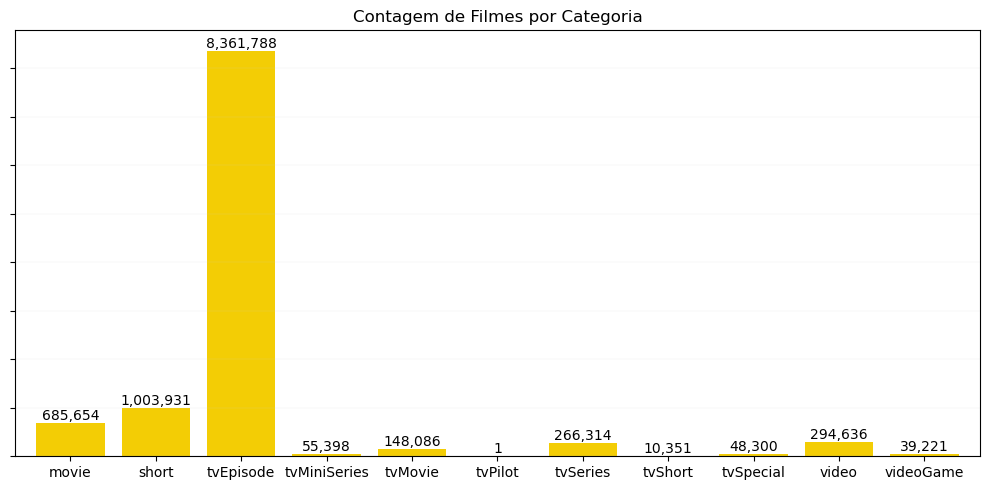

In [22]:
contagem_por_categoria = contagem_por_categoria.sort_index()

plt.figure(figsize=(10, 5))
bars = contagem_por_categoria.plot(kind='bar', color='#F3CD05', width=0.8)  

# Adicionar rótulos de dados no topo das barras
for bar, count in zip(bars.patches, contagem_por_categoria):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.3, 
             f'{count:,.0f}',  # Corrigido o f-string para formatação numérica
             ha='center', va='bottom', fontsize=10, color='black')

# Adicionar rótulos e título
plt.xlabel('')
plt.ylabel('')
plt.title('Contagem de Filmes por Categoria')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.1)
plt.gca().axes.yaxis.set_ticklabels([])  # Remover os números do eixo y

plt.tight_layout()
plt.show()

`Embora nosso conjunto de dados contenha várias categorias, optei por filtrar e analisar apenas a categoria 'movie'.`

- <strong>Número de Títulos por Gênero:</strong> Análise quantitativa dos títulos de filmes por gênero.

In [23]:
generos_separados = df_filmes['generos'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
generos_separados.name = 'genero'

# Criar um novo DataFrame com a coluna 'genero'
df_generos = df_filmes.drop('generos', axis=1).join(generos_separados)

In [24]:
df_generos.head(5)

,id_titulo,categoria,titulo_principal,titulo_original,ano,duracao_minutos,media_avaliacoes,num_votos,genero
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45.00,5.40,212,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.00,5.20,517,Documentary
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.00,5.20,517,News
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.00,5.20,517,Sport
2,tt0000502,movie,Bohemios,Bohemios,1905,100.00,4.20,18,NaN


In [25]:
nomes_generos = generos_separados.unique()

# Imprimir os nomes dos gêneros um por linha
print("\nGenêros de Filmes:\n")
for genero in nomes_generos:
    print(genero)


Genêros de Filmes:

Romance
Documentary
News
Sport
Action
Adventure
Biography
Drama
Fantasy
Comedy
War
Crime
Family
History
Sci-Fi
Thriller
Western
Mystery
Horror
Music
Animation
Musical
Film-Noir
Adult
Reality-TV
Game-Show
Talk-Show


In [26]:
# Contar a quantidade de vezes que cada gênero aparece
contagem_generos = df_generos['genero'].value_counts()

contagem_generos = contagem_generos.sort_values(ascending=False)

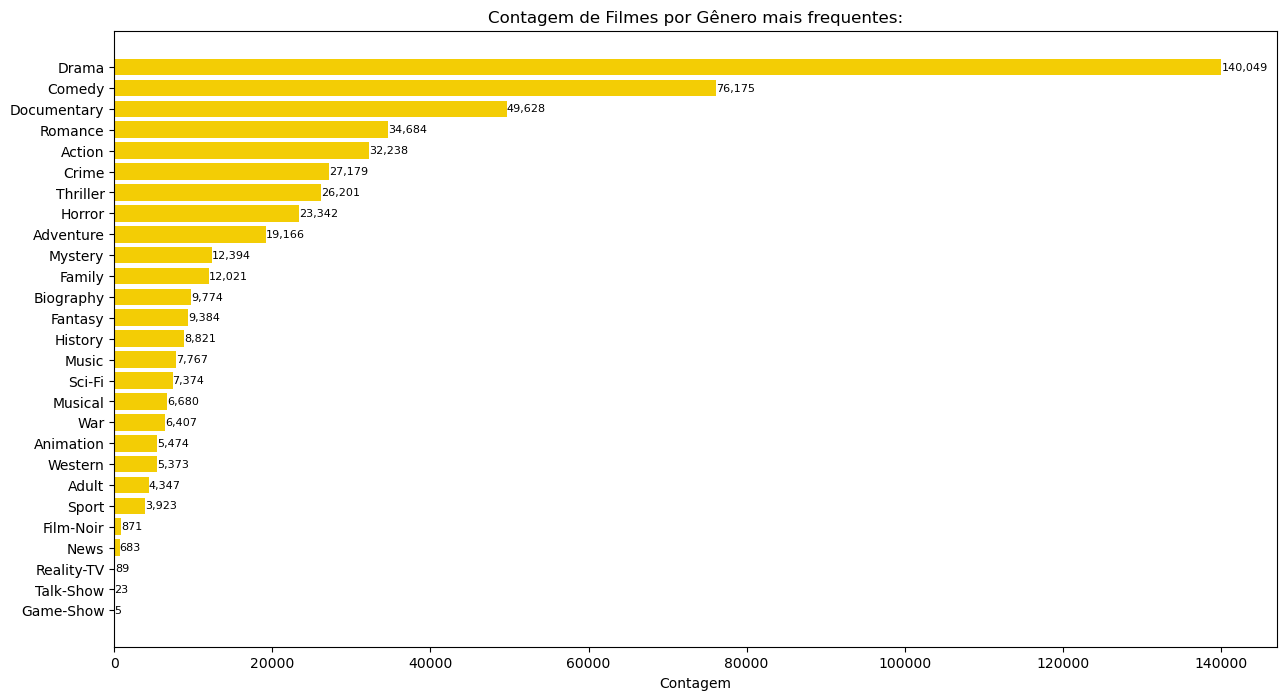

In [27]:
# Configurar o gráfico de barras
plt.figure(figsize=(15, 8))
bars = plt.barh(contagem_generos.index, contagem_generos.values, color="#F3CD05")

# Adicionar rótulos de dados (números) nas barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', fontsize=8)

plt.xlabel('Contagem')
plt.title('Contagem de Filmes por Gênero mais frequentes:')
plt.gca().invert_yaxis()  # Inverte o eixo y para exibir o maior número no topo
plt.show()

`Drama: O gênero mais frequêntes nos filmes produzidos são Drama, comedy e Documentary.`

- <strong>Mediana de Avaliação por Gênero:</strong> Avaliação da mediana das classificações dos filmes agrupados por gênero.

In [28]:
mediana_avaliacao_por_genero = df_generos.dropna(subset=['genero', 'media_avaliacoes'])
mediana_avaliacao_por_genero


,id_titulo,categoria,titulo_principal,titulo_original,ano,duracao_minutos,media_avaliacoes,num_votos,genero
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45.00,5.40,212,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.00,5.20,517,Documentary
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.00,5.20,517,News
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.00,5.20,517,Sport
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.00,6.00,914,Action
...,...,...,...,...,...,...,...,...,...
312853,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,2019,NaN,3.60,19,History
312853,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,2019,NaN,3.60,19,War
312854,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,8.30,9,Drama
312855,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,2013,NaN,7.60,5,Comedy


In [29]:
mediana_avaliacao_por_genero = mediana_avaliacao_por_genero.groupby('genero')['media_avaliacoes'].median().sort_values(ascending=True)

print("Mediana de avaliação dos filmes por gênero:")
print(mediana_avaliacao_por_genero)

Mediana de avaliação dos filmes por gênero:
genero
Horror        5.00
Sci-Fi        5.40
Adult         5.60
Thriller      5.60
Action        5.80
Mystery       5.90
Fantasy       6.00
Western       6.00
Adventure     6.00
Comedy        6.00
Crime         6.10
Romance       6.20
Drama         6.30
Family        6.30
Musical       6.30
Talk-Show     6.40
Film-Noir     6.50
War           6.50
Animation     6.50
Reality-TV    6.60
Sport         6.70
History       6.90
Music         6.90
Game-Show     6.90
Biography     7.00
Documentary   7.30
News          7.30
Name: media_avaliacoes, dtype: float64


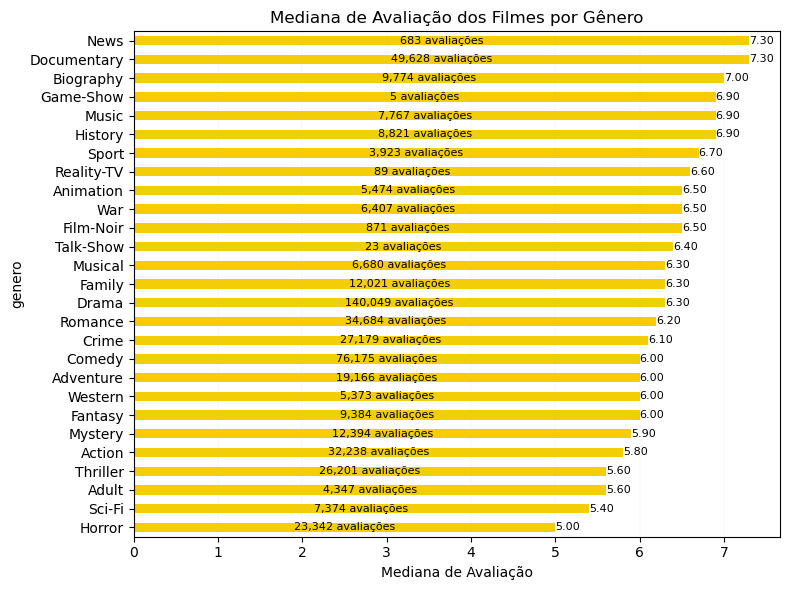

In [30]:
# Combine os dados em um único DataFrame
dados_combinados = pd.DataFrame({
    'mediana': mediana_avaliacao_por_genero,
    'contagem': contagem_generos
}).sort_values(by='mediana', ascending=True)

# Plotar o gráfico
plt.figure(figsize=(8, 6))
ax = dados_combinados['mediana'].plot(kind='barh', color="#F3CD05")
plt.xlabel('Mediana de Avaliação')
plt.title('Mediana de Avaliação dos Filmes por Gênero')
plt.tight_layout()
plt.grid(axis='x', color='lightgray', linestyle='-', linewidth=0.1)

# Adicionar valores nas barras
for index, (value, count) in enumerate(zip(dados_combinados['mediana'], dados_combinados['contagem'])):
    ax.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=8)
    ax.text(value/2, index, f'{count:,.0f} avaliações', va='center', ha='center', color='black', fontsize=8)

plt.show()

`News, Documentário e Biografia: Possuem a maior mediana de avaliação, mas com menor quantidade de avaliações em comparação com Drama, Comédia e Aventura.`

- <strong>Fatores que Influenciam as Avaliações de Filmes:</strong>

<strong>Polarização das Opiniões:</strong> Filmes populares podem gerar opiniões extremas, resultando em notas muito altas ou muito baixas, o que pode baixar a mediana das avaliações.

<strong>Tamanho da Amostra: </strong>Filmes com poucas avaliações podem ter notas mais altas porque os poucos avaliadores são fãs do filme ou do gênero, não refletindo a opinião geral.

<strong>Público-alvo Diferente: </strong>Filmes para nichos específicos podem ter notas altas entre seus fãs, mas não atraem avaliações suficientes para mostrar a opinião do público em geral.




- <strong>Mediana de Avaliação por Ano de Estreia:</strong> Análise da mediana das avaliações dos filmes em relação aos anos de lançamento.

In [31]:
mediana_avaliacao_por_ano = df_filmes.groupby('ano')['media_avaliacoes'].median()
display(mediana_avaliacao_por_ano)

ano
1894   5.40
1896   4.00
1897   4.80
1898   3.60
1899   3.60
       ... 
2020   6.30
2021   6.40
2022   6.50
2023   6.60
2024   7.00
Name: media_avaliacoes, Length: 130, dtype: float64

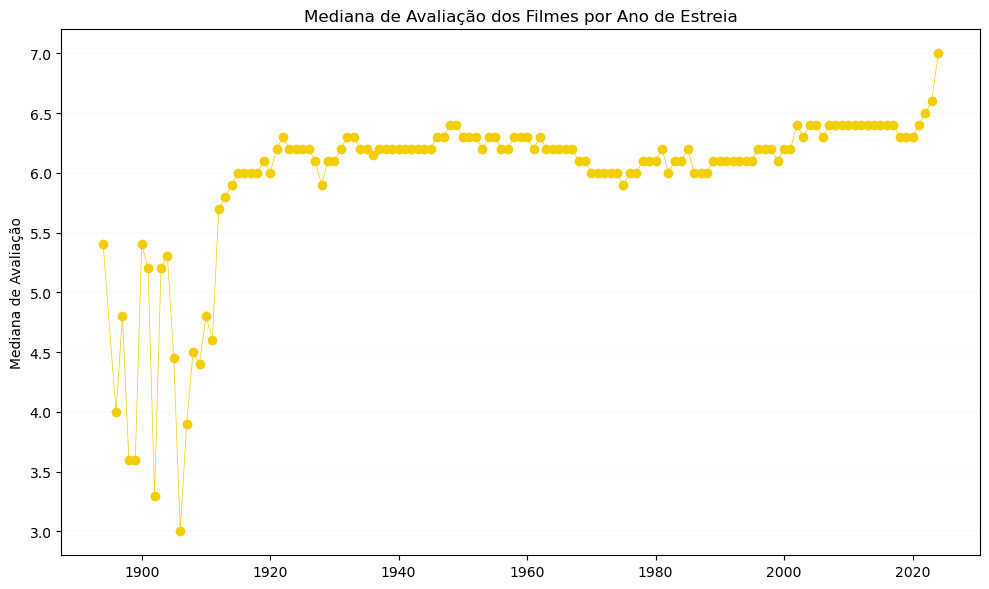

In [78]:
plt.figure(figsize=(10, 6))
mediana_avaliacao_por_ano.plot(marker='o', linestyle='-', linewidth=0.5, color="#F3CD05")
plt.xlabel('')  # Remover o título do eixo X
plt.ylabel('Mediana de Avaliação')
plt.title('Mediana de Avaliação dos Filmes por Ano de Estreia')
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.1)

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()

plt.show()

`A mediana se mantém entre 6 e 6,5 de 1910 a 2020, porém eEm 2024, a mediana sobe para 7,00, possivelmente devido ao menor número de filmes avaliados até o momento.
`

- <strong>Número de Filmes Avaliados por Gênero e Ano de Estreia:</strong> Quantificação dos filmes avaliados por gênero ao longo dos anos.

In [33]:
filmes_por_genero_ano = df_generos.groupby(['ano', 'genero']).size().unstack(fill_value=0) #unstack - transforma de coluna p/ linha.
display(filmes_por_genero_ano)

genero,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
ano,,,,,,,,,,,,,,,,,,,,,
1894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1897,0,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,2,0,0,0,0
1898,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1899,0,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,662,10,401,228,303,1584,498,2433,3191,290,...,361,5,9,610,264,147,3,911,102,30
2021,882,5,374,257,353,1689,617,2308,3577,295,...,424,3,3,674,302,140,5,1057,72,49
2022,966,11,456,235,342,2211,694,2369,4079,391,...,507,7,10,849,297,163,1,1382,89,40


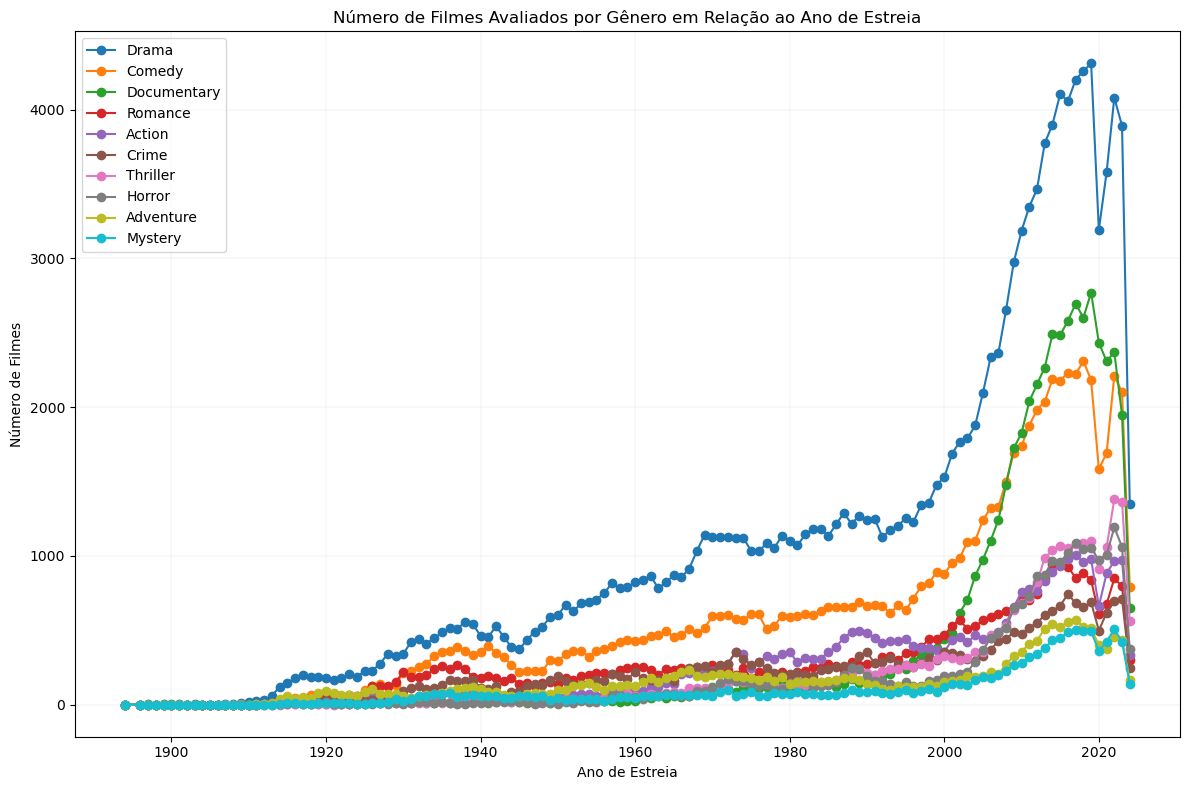

In [34]:

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))

# Selecionar os gêneros mais comuns para plotagem
generos_plot = filmes_por_genero_ano.sum().sort_values(ascending=False).index[:10]

for genero in generos_plot:
    plt.plot(filmes_por_genero_ano.index, filmes_por_genero_ano[genero], marker='o', label=genero)

plt.xlabel('Ano de Estreia')
plt.ylabel('Número de Filmes')
plt.title('Número de Filmes Avaliados por Gênero em Relação ao Ano de Estreia')
plt.grid(True, color='lightgray', linestyle='-', linewidth=0.2)  
plt.legend()
plt.tight_layout()

plt.show()

`O drama se mantém como o gênero com maior número de filmes avaliados.`

- <strong>Filme com Maior Duração:</strong> Identificação do filme com a maior duração:

In [35]:
# Encontrar o filme com maior tempo de duração
filme_maior_duracao = df_filmes.loc[df_filmes['duracao_minutos'].idxmax()]

print("Filme com maior tempo de duração:")
print(filme_maior_duracao[['id_titulo', 'titulo_principal', 'duracao_minutos']])

id_titulo = filme_maior_duracao['id_titulo']


Filme com maior tempo de duração:
id_titulo           tt8273150
titulo_principal    Logistics
duracao_minutos     51,420.00
Name: 302750, dtype: object


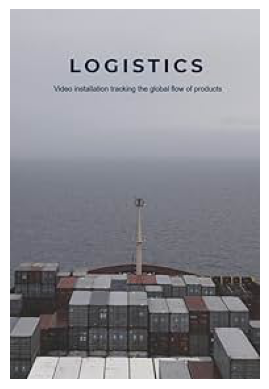

In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Configurando o WebDriver do Chrome
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# A URL da página web
url_base = "https://www.imdb.com/title/"
url_completa = url_base + id_titulo

# Abrindo a página web
driver.get(url_completa)

# Esperando a página carregar completamente (pode ajustar conforme necessário)
driver.implicitly_wait(10)

# Usando o XPath para localizar a imagem
try:
    image_element = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/section[1]/section/div[3]/section/section/div[3]/div[1]/div/div/div[1]/img')
    
    # Pegando o URL da imagem (src ou qualquer outro atributo relevante)
    image_url = image_element.get_attribute('src')
    
    if image_url:
        # Baixando a imagem
        response = requests.get(image_url)
        if response.status_code == 200:
            # Abrindo a imagem diretamente dos bytes recebidos
            img = Image.open(BytesIO(response.content))
            # Mostrando a imagem usando matplotlib
            plt.imshow(img)
            plt.axis('off')  # Desativa os eixos
            plt.show()
        else:
            print(f'Falha ao baixar a imagem. Status code: {response.status_code}')
    else:
        print('O atributo src não foi encontrado no elemento da imagem.')

except Exception as e:
    print(f'Ocorreu um erro ao tentar encontrar o elemento da imagem: {e}')

# Fechando o WebDriver
driver.quit()

Você pode verificar o filme mencionado acima no [IMDB](https://www.imdb.com/title/tt29302558/).


`O filme mas longo do nosso banco de dados é o "Logistics", com duração de 51.420 minutos, equivalente a 857 horas.`     

- <strong>Percentis: </strong> Cálculo dos percentis relacionados à duração dos filmes:

In [37]:
df_filmes_sem_nulos = df_filmes.dropna(subset=['duracao_minutos'])
df_filmes_sem_nulos = df_filmes_sem_nulos[df_filmes_sem_nulos['duracao_minutos'] != '']
df_filmes_sem_nulos = df_filmes_sem_nulos[df_filmes_sem_nulos['duracao_minutos'] != 'NaN']

In [38]:
df_filmes_sem_nulos['duracao_minutos'].describe()

count   281,817.00
mean         94.27
std         135.07
min           1.00
25%          80.00
50%          91.00
75%         103.00
max      51,420.00
Name: duracao_minutos, dtype: float64

`A média de duração dos filmes é de 89.71 minutos, com alto desvio padrão devido à presença de outliers (filmes muito longos).`


In [39]:
percentis = [0.25, 0.5, 0.75]
percentis_duracao = df_filmes_sem_nulos['duracao_minutos'].quantile(percentis) #quantile:  calcula os percentis especificados para a série de dados. Ele retorna um objeto pandas Series com os percentis como índices.


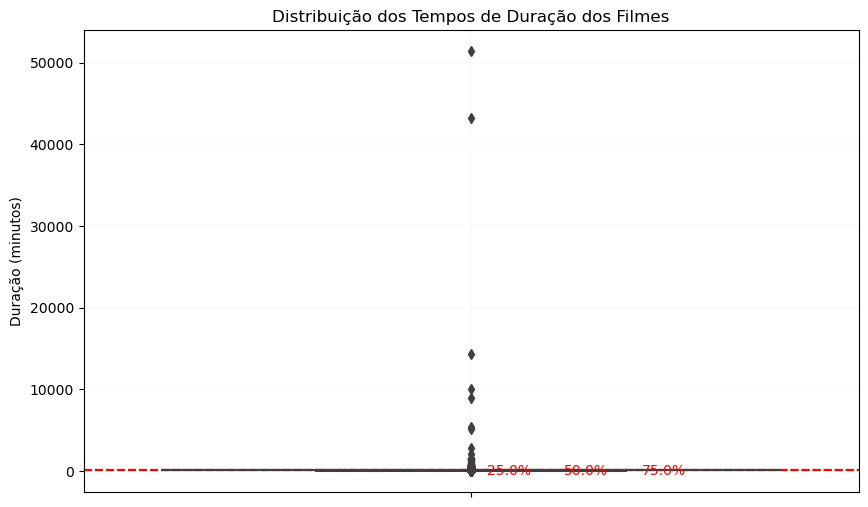

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_filmes_sem_nulos['duracao_minutos'])

# Adicionar linhas para os percentis calculados
for i, (percentile, value) in enumerate(percentis_duracao.items()):
    plt.axhline(value, color='r', linestyle='--')
    plt.text(0.02 + i*0.1, value, f'{percentile * 100}%', color='r', ha='left', va='center')

plt.title('Distribuição dos Tempos de Duração dos Filmes')
plt.ylabel('Duração (minutos)')
plt.grid(True, color='lightgray', linestyle='-', linewidth=0.1)  
plt.show()


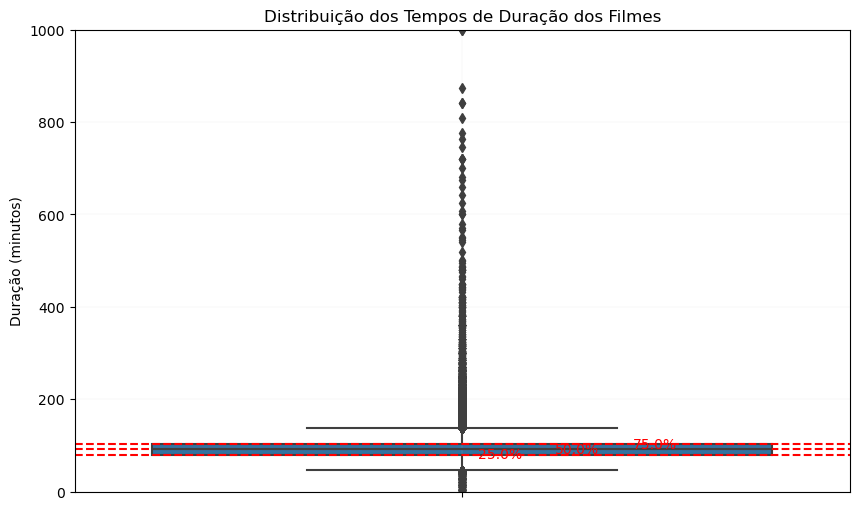

In [41]:
plt.figure(figsize=(10, 6))

# Boxplot usando Seaborn
sns.boxplot(y=df_filmes_sem_nulos['duracao_minutos'])

# Adicionar linhas para os percentis calculados
for i, (percentile, value) in enumerate(percentis_duracao.items()):
    plt.axhline(value, color='r', linestyle='--')
    plt.text(0.02 + i*0.1, value, f'{percentile * 100}%', color='r', ha='left', va='center')

# Ajustar os limites do eixo y para destacar a contagem de 0 a 1000
plt.ylim(0, 1000)

plt.title('Distribuição dos Tempos de Duração dos Filmes')
plt.ylabel('Duração (minutos)')
plt.grid(True, color='lightgray', linestyle='-', linewidth=0.1)  
plt.show()

In [42]:
df_filmes_sem_nulos = df_filmes_sem_nulos.sort_values(by='duracao_minutos', ascending=False)
df_filmes_sem_nulos.head(10)

,id_titulo,categoria,titulo_principal,titulo_original,ano,duracao_minutos,generos,media_avaliacoes,num_votos
302750,tt8273150,movie,Logistics,Logistics,2012,"51,420.00",Documentary,6.70,263
260289,tt3854496,movie,Ambiancé,Ambiancé,2020,"43,200.00",Documentary,3.20,129
236146,tt2659636,movie,Modern Times Forever,Modern Times Forever,2011,"14,400.00",Documentary,6.30,101
156115,tt10844900,movie,Qw,Qw,2019,"10,062.00",Drama,6.60,38
228314,tt2355497,movie,Beijing 2003,Beijing 2003,2004,"9,000.00",Documentary,7.20,32
274210,tt5136218,movie,London EC1,London EC1,2015,"5,460.00","Comedy,Drama,Mystery",6.40,8
109241,tt0284020,movie,The Cure for Insomnia,The Cure for Insomnia,1987,"5,220.00","Documentary,Music",4.80,421
120239,tt0342707,movie,The Longest Most Meaningless Movie in the World,The Longest Most Meaningless Movie in the World,1970,"2,880.00","Documentary,Drama,History",5.80,198
157209,tt10958742,movie,Five-Year Diary,Five-Year Diary,1982,"2,160.00",Documentary,7.60,29
78834,tt0165127,movie,Burning of the Red Lotus Monastery,Huo shao hong lian si,1928,"1,620.00",Drama,7.40,61


- <strong>Relação entre Duração e Gênero:</strong> Análise da relação entre a duração dos filmes e seus respectivos gêneros.

In [43]:
df_generos.dropna(subset=['duracao_minutos'], inplace=True)

# Calcular estatísticas descritivas da duração por gênero
stats_duração_por_gênero = df_generos.groupby('genero')['duracao_minutos'].describe()

display(stats_duração_por_gênero)

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
Action,"28,867.00",102.92,30.23,1.00,87.00,95.00,115.00,"1,428.00"
Adult,"3,734.00",76.82,14.94,38.00,68.00,78.00,84.00,225.00
Adventure,"17,774.00",94.33,28.32,9.00,81.00,90.00,102.00,485.00
Animation,"5,109.00",84.46,23.35,3.00,73.00,83.00,94.00,424.00
Biography,"9,382.00",96.01,27.65,15.00,80.00,93.00,110.00,467.00
Comedy,"70,786.00",94.97,28.85,1.00,85.00,92.00,102.00,"5,460.00"
Crime,"25,660.00",96.92,25.04,6.00,85.00,94.00,106.00,"1,234.00"
Documentary,"45,932.00",84.55,325.11,4.00,65.00,81.00,92.00,"51,420.00"
Drama,"129,576.00",98.84,41.57,1.00,85.00,95.00,109.00,"10,062.00"


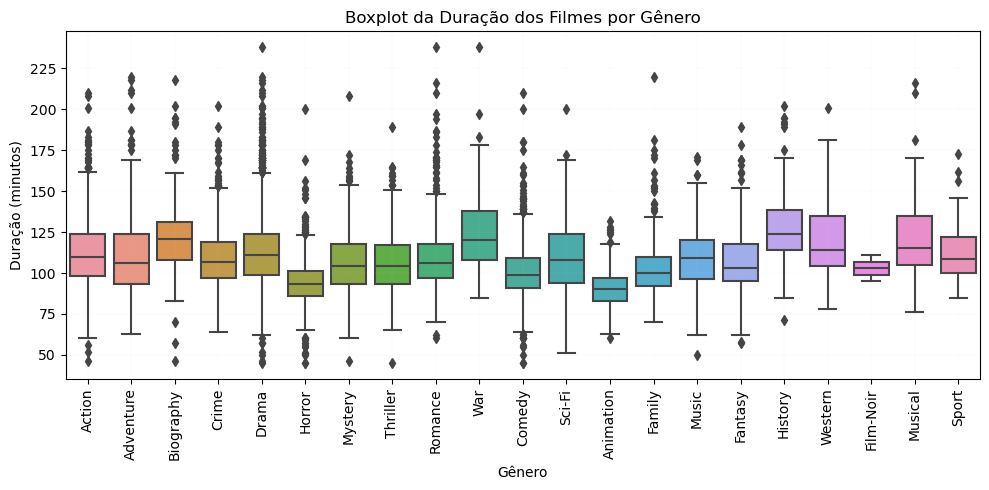

In [77]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='genero', y='duracao_minutos', data=df_generos)
plt.title('Boxplot da Duração dos Filmes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Duração (minutos)')
plt.xticks(rotation=90)
plt.grid(True, color='lightgray', linestyle='-', linewidth=0.05)  
plt.tight_layout()
plt.show()

- <strong>Top 15 Melhores e Piores Filmes:</strong> Identificação dos 15 melhores e 15 piores filmes com base nas avaliações.

`Critérios: Maior número de votos seguido da maior mediana de avaliação.`

In [45]:
df_filmes_top = df_filmes.sort_values(by=['num_votos', 'media_avaliacoes'], ascending=[False, False]).head(15)

print("Top 15 Melhores Filmes:")
display(df_filmes_top[['titulo_principal', 'num_votos', 'media_avaliacoes']])

Top 15 Melhores Filmes:


,titulo_principal,num_votos,media_avaliacoes
62197,The Shawshank Redemption,2912371,9.30
138045,The Dark Knight,2893597,9.00
179387,Inception,2570529,8.80
72189,Fight Club,2345337,8.80
61464,Forrest Gump,2277257,8.80
62050,Pulp Fiction,2238375,8.90
143893,Interstellar,2126853,8.70
70907,The Matrix,2069698,8.70
37338,The Godfather,2029452,9.20
66879,The Lord of the Rings: The Fellowship of the Ring,2022740,8.90


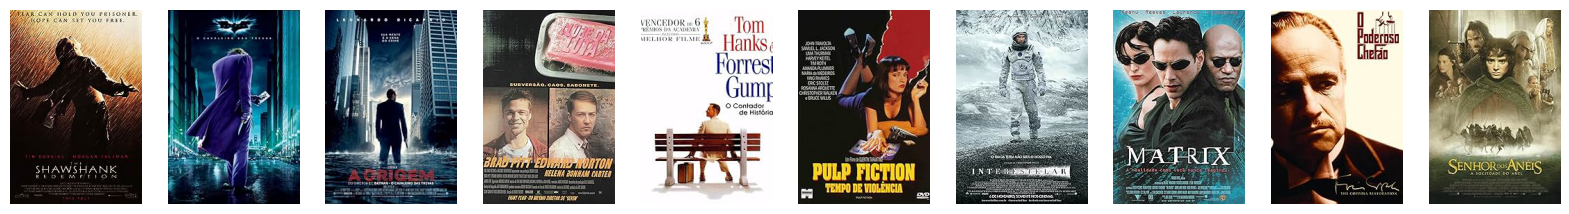

In [46]:
df_filmes_top1 = df_filmes[['id_titulo', 'num_votos']]
df_filmes_top1 = df_filmes_top1.sort_values(by='num_votos', ascending=False).head(10)

# Configurando o WebDriver do Chrome
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# Função para baixar e retornar a primeira imagem para um ID de título específico
def obter_primeira_imagem(id_titulo):
    url_base = "https://www.imdb.com/title/"
    url_completa = url_base + id_titulo
    
    # Abrindo a página web
    driver.get(url_completa)
    
    # Esperando a página carregar completamente (pode ajustar conforme necessário)
    driver.implicitly_wait(10)
    
    try:
        # Usando o XPath para localizar a primeira imagem (ajustar conforme a estrutura da página)
        image_element = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/section[1]/section/div[3]/section/section/div[3]/div[1]/div/div/div[1]/img')
        
        # Pegando o URL da imagem (src ou qualquer outro atributo relevante)
        image_url = image_element.get_attribute('src')
        
        if image_url:
            # Baixando a imagem
            response = requests.get(image_url)
            if response.status_code == 200:
                # Abrindo a imagem diretamente dos bytes recebidos
                img = Image.open(BytesIO(response.content))
                return img
            else:
                print(f'Falha ao baixar a imagem. Status code: {response.status_code}')
        else:
            print('O atributo src não foi encontrado no elemento da imagem.')
    
    except Exception as e:
        print(f'Ocorreu um erro ao tentar encontrar o elemento de imagem para o título {id_titulo}: {e}')
    return None

# Armazenar as imagens
imagens = []

# Iterar sobre os IDs de títulos
for id_titulo in df_filmes_top1['id_titulo']:
    img = obter_primeira_imagem(id_titulo)
    if img:
        imagens.append(img)

# Fechando o WebDriver
driver.quit()

# Mostrar todas as imagens em uma única figura
if imagens:
    fig, axes = plt.subplots(1, len(imagens), figsize=(20, 10))
    
    for ax, img in zip(axes, imagens):
        ax.imshow(img)
        ax.axis('off')  # Desativa os eixos
    
    plt.show()
else:
    print('Nenhuma imagem foi encontrada.')

### Filmes Populares:

- `The Shawshank Redemption`
  
- `The Dark Knight e Inception`
  
### Observações Gerais:

- `Filmes como The Godfather e The Lord of the Rings têm altas médias de avaliações, refletindo sua popularidade duradoura e impacto cultural.`


In [47]:
df_filmes_piores = df_filmes.sort_values(by=['num_votos', 'media_avaliacoes'], ascending=[True, True]).head(15)

print("\n15 Piores Filmes:")
display(df_filmes_piores[['titulo_principal', 'num_votos', 'media_avaliacoes']])


15 Piores Filmes:


,titulo_principal,num_votos,media_avaliacoes
240183,The Doll: Creation,5,1.00
247354,Borde Sagi,5,1.00
247719,Arezoohayat Ra Be Khak Naspar,5,1.00
252020,Muffy Loves Alison,5,1.40
216900,Saman,5,1.60
237767,Men of Earth,5,1.60
170348,Çok Mu Komik?,5,1.80
299948,See You Again,5,1.80
164746,Get Lost: Urban Legend di Benteng Pendem,5,2.20
252094,Christine,5,2.20


- <strong>Gêneros Mais Populares por Década:</strong> Análise dos gêneros mais populares em cada década.

In [48]:
df_generos['decada'] = (np.floor(df_generos['ano'] / 10) * 10).astype(int)

# Contagem de gêneros por década
contagem_generos_por_decada = df_generos.groupby(['decada', 'genero']).size().reset_index(name='contagem')

contagem_generos_por_decada

,decada,genero,contagem
0,1890,Documentary,3
1,1890,News,2
2,1890,Romance,1
3,1890,Sport,2
4,1900,Action,1
...,...,...,...
293,2020,Sport,596
294,2020,Talk-Show,9
295,2020,Thriller,4686
296,2020,War,340


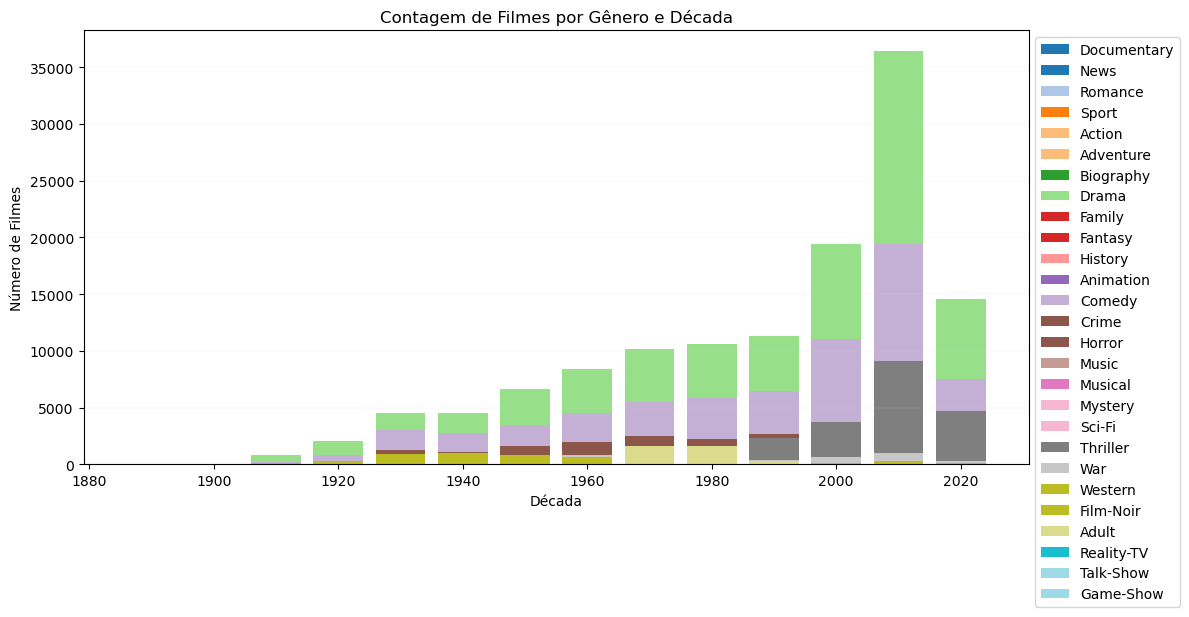

In [49]:

plt.figure(figsize=(12, 6))

# Criar um dicionário para mapear os gêneros para uma cor única
cores = plt.cm.get_cmap('tab20', len(contagem_generos_por_decada['genero'].unique()))

# Ajuste da largura das barras
largura_barras = 8  

# Iterar sobre os gêneros para plotagem
for i, genero in enumerate(contagem_generos_por_decada['genero'].unique()):
    df_genero = contagem_generos_por_decada[contagem_generos_por_decada['genero'] == genero]
    plt.bar(df_genero['decada'], df_genero['contagem'], color=cores(i), width=largura_barras, label=genero)

plt.xlabel('Década')
plt.ylabel('Número de Filmes')
plt.title('Contagem de Filmes por Gênero e Década')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.1)

plt.tight_layout()
plt.show()

`Na maioria das décadas temos o gênero Drama, seguido por Comédia.`

- <strong> Número de Filmes Produzidos por País: </strong> Quantificação dos filmes produzidos por país.

In [50]:
df_regiao = pd.read_csv('regiao.csv')

In [51]:
df_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48896834 entries, 0 to 48896833
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   titleId  object
 1   region   object
dtypes: object(2)
memory usage: 746.1+ MB


In [52]:
new_column_names = {
    'titleId': 'id_titulo',
    'region': 'pais',
}

df_regiao.rename(columns=new_column_names, inplace=True)

In [53]:
df_regiao_final = pd.merge(df_filmes, df_regiao, on="id_titulo", how="inner")

In [54]:
regioes = df_regiao_final.groupby('pais')['id_titulo'].count().reset_index(name='contagem')
regioes = regioes.sort_values(by='contagem', ascending=False)
regioes

,pais,contagem
199,US,212924
69,GB,138911
33,CA,100678
93,IN,78685
67,FR,78674
...,...,...
202,VA,1
35,CF,1
104,KM,1
52,DJ,1


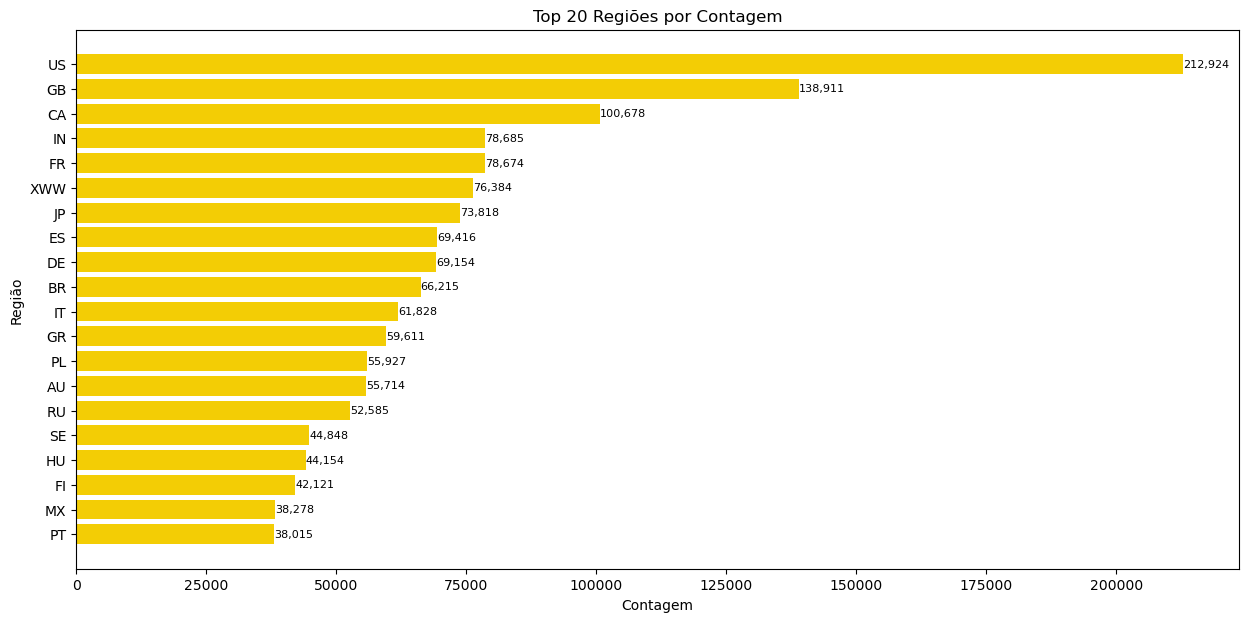

In [55]:
top_20_regioes = regioes.head(20)

# Definir tamanho menor para os rótulos
plt.rcParams['font.size'] = 10

# Criar um gráfico de barras horizontais
plt.figure(figsize=(15, 7))
bars = plt.barh(top_20_regioes['pais'], top_20_regioes['contagem'], color='#F3CD05')

# Adicionar os valores de contagem como rótulos nas barras
for bar, contagem in zip(bars, top_20_regioes['contagem']):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, f'{contagem:,.0f}', ha='left', va='center', fontsize=8)

plt.xlabel('Contagem')
plt.ylabel('Região')
plt.title('Top 20 Regiões por Contagem')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a maior contagem esteja no topo
plt.show()

- <strong> Filmes mais lucrativos </strong> 

`Para complementar as análises efetuadas, incluí informações adicionais do arquivo 'movies_pj.xlsx'.`

`Essas informações foram obtidas no módulo de SQL e vão enriquecer a análise com dados sobre orçamento, faturamento, lucro, produtoras, roteiristas e diretores.`

In [56]:
# Importação dos dados
df_movies = pd.read_excel('movies_pj.xlsx')

In [57]:
# Junção do df_filmes + df_movies
df_movies_final = pd.merge(df_filmes, df_movies, on="id_titulo", how="inner")

In [58]:
df_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85594 entries, 0 to 85593
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_titulo          85594 non-null  object 
 1   categoria          85594 non-null  object 
 2   titulo_principal   85594 non-null  object 
 3   titulo_original_x  85594 non-null  object 
 4   ano                85594 non-null  Int64  
 5   duracao_minutos    85593 non-null  float64
 6   generos            85593 non-null  object 
 7   media_avaliacoes   85594 non-null  float64
 8   num_votos          85594 non-null  int64  
 9   titulo_original_y  85594 non-null  object 
 10  pais               85531 non-null  object 
 11  diretores          85510 non-null  object 
 12  escritores         84035 non-null  object 
 13  produtoras         81164 non-null  object 
 14  moeda_orçamento    23679 non-null  object 
 15  orçamento          23679 non-null  float64
 16  usa_moeda_receita  153

In [59]:
#Filtrei os DataFrames para incluir apenas 5.000 linhas dos filmes com os maiores lucros em dólares.
df_movies_final = df_movies_final[df_movies_final['moeda_orçamento']=='$']
df_movies_final = df_movies_final.sort_values(by='lucro', ascending=False)
df_movies_final = df_movies_final.head(5000)


In [60]:
df_lucro = df_movies_final[['titulo_original_x', 'moeda_orçamento','orçamento','media_avaliacoes','num_votos', 'mundo_receita', 'lucro']]
df_lucro1 = df_lucro.sort_values(by='lucro', ascending=False)
df_lucro1 = df_lucro.head(10)
df_lucro1

,titulo_original_x,moeda_orçamento,orçamento,media_avaliacoes,num_votos,mundo_receita,lucro
49303,Avatar,$,"237,000,000.00",7.90,1394053,"2,790,439,092.00",2553439092
73684,Avengers: Endgame,$,"356,000,000.00",8.40,1279673,"2,797,800,564.00",2441800564
31030,Titanic,$,"200,000,000.00",7.90,1291187,"2,195,169,869.00",1995169869
67361,Star Wars: Episode VII - The Force Awakens,$,"245,000,000.00",7.80,978757,"2,068,224,036.00",1823224036
73683,Avengers: Infinity War,$,"321,000,000.00",8.40,1216373,"2,048,359,754.00",1727359754
43720,Jurassic World,$,"150,000,000.00",6.90,683714,"1,670,401,444.00",1520401444
79426,The Lion King,$,"260,000,000.00",6.80,268870,"1,656,963,790.00",1396963790
68592,Fast & Furious 7,$,"190,000,000.00",7.10,416930,"1,515,048,151.00",1325048151
74751,Frozen II,$,"150,000,000.00",6.80,196681,"1,450,026,933.00",1300026933
50660,The Avengers,$,"220,000,000.00",8.00,1466703,"1,518,814,206.00",1298814206


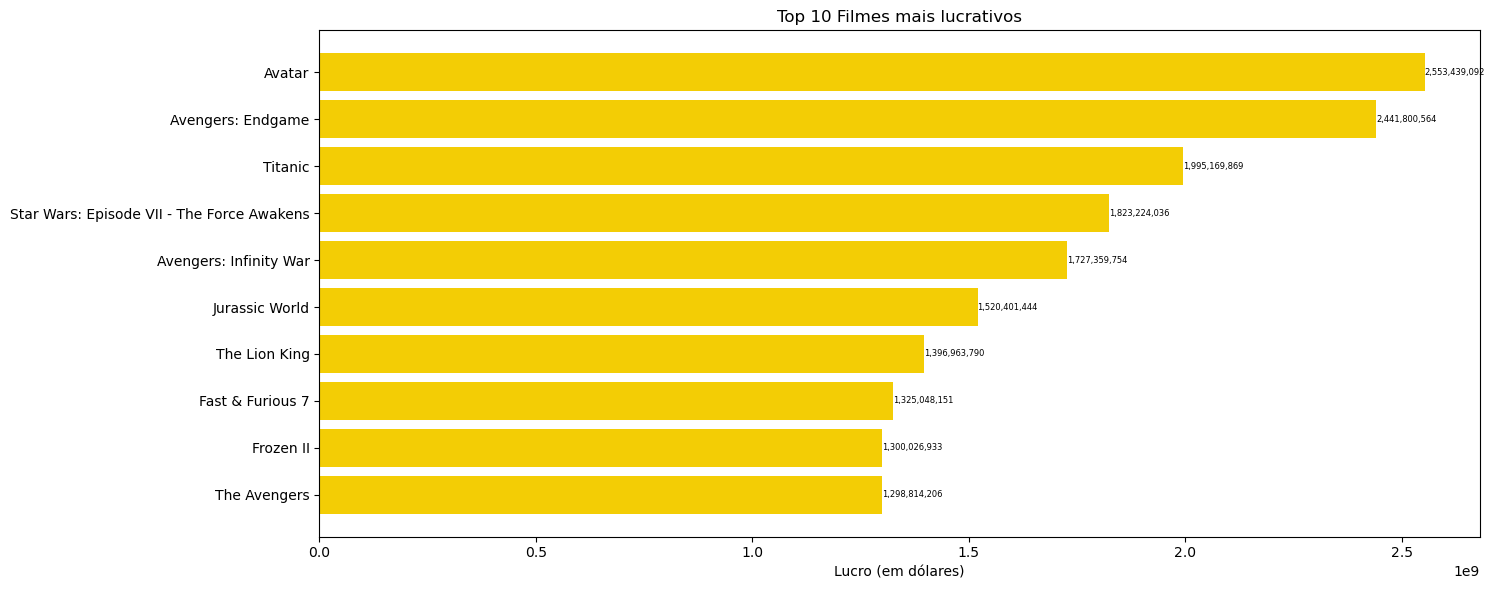

In [61]:
# Criar o gráfico
plt.figure(figsize=(15, 6))
plt.barh(df_lucro1['titulo_original_x'], df_lucro1['lucro'], color='#F3CD05')
plt.xlabel('Lucro (em dólares)')
plt.ylabel('')
plt.title('Top 10 Filmes mais lucrativos')
plt.gca().invert_yaxis()  # Inverter a ordem para que o filme mais lucrativo fique no topo
plt.tight_layout()

# Adicionar os valores nas barras com fonte menor
for index, value in enumerate(df_lucro1['lucro']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=6)

plt.show()

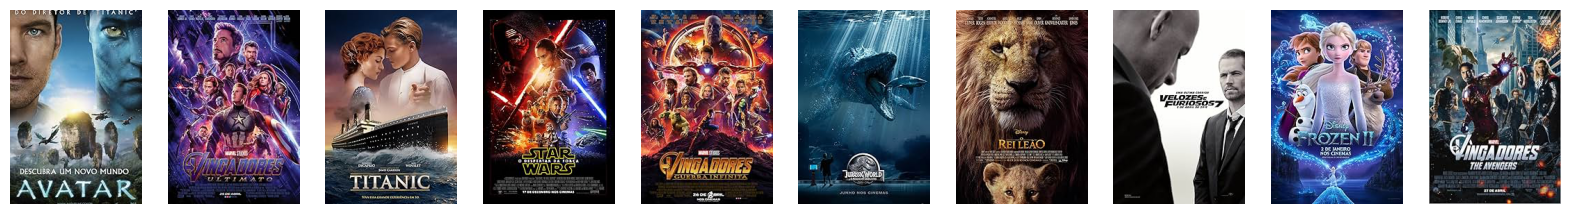

In [62]:
df_lucro2 = df_movies_final[['id_titulo', 'lucro']]
df_lucro2 = df_lucro2.sort_values(by='lucro', ascending=False).head(10)

# Configurando o WebDriver do Chrome
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# Função para baixar e retornar a primeira imagem para um ID de título específico
def obter_primeira_imagem(id_titulo):
    url_base = "https://www.imdb.com/title/"
    url_completa = url_base + id_titulo
    
    # Abrindo a página web
    driver.get(url_completa)
    
    # Esperando a página carregar completamente (pode ajustar conforme necessário)
    driver.implicitly_wait(10)
    
    try:
        # Usando o XPath para localizar a primeira imagem (ajustar conforme a estrutura da página)
        image_element = driver.find_element(By.XPATH, '//*[@id="__next"]/main/div/section[1]/section/div[3]/section/section/div[3]/div[1]/div/div/div[1]/img')
        
        # Pegando o URL da imagem (src ou qualquer outro atributo relevante)
        image_url = image_element.get_attribute('src')
        
        if image_url:
            # Baixando a imagem
            response = requests.get(image_url)
            if response.status_code == 200:
                # Abrindo a imagem diretamente dos bytes recebidos
                img = Image.open(BytesIO(response.content))
                return img
            else:
                print(f'Falha ao baixar a imagem. Status code: {response.status_code}')
        else:
            print('O atributo src não foi encontrado no elemento da imagem.')
    
    except Exception as e:
        print(f'Ocorreu um erro ao tentar encontrar o elemento de imagem para o título {id_titulo}: {e}')
    return None

# Armazenar as imagens
imagens = []

# Iterar sobre os IDs de títulos
for id_titulo in df_lucro2['id_titulo']:
    img = obter_primeira_imagem(id_titulo)
    if img:
        imagens.append(img)

# Fechando o WebDriver
driver.quit()

# Mostrar todas as imagens em uma única figura
if imagens:
    fig, axes = plt.subplots(1, len(imagens), figsize=(20, 10))
    
    for ax, img in zip(axes, imagens):
        ax.imshow(img)
        ax.axis('off')  # Desativa os eixos
    
    plt.show()
else:
    print('Nenhuma imagem foi encontrada.')


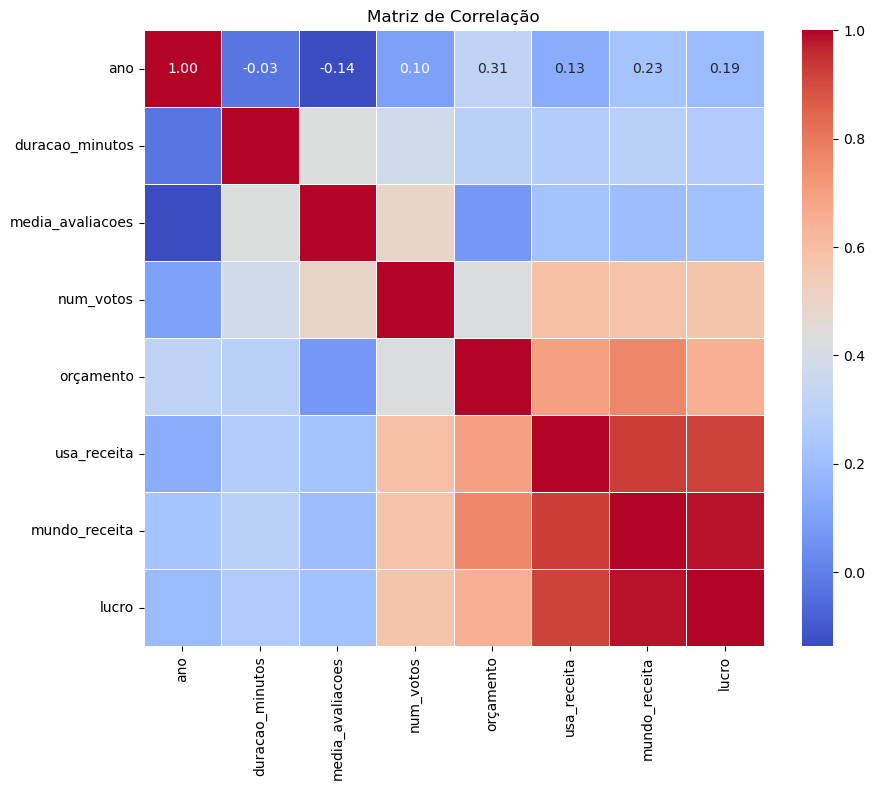

In [63]:
# Selecionar apenas colunas numéricas
df_numeric = df_movies_final.select_dtypes(include=['number'])

# Remover todas as linhas que contêm valores vazios
df_numeric = df_numeric.dropna()

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap com seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5, annot_kws={"size": 10})

# Adicionar título
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()


In [64]:
df_duracao = df_movies_final[['titulo_original_x', 'duracao_minutos','media_avaliacoes','num_votos', 'moeda_orçamento','lucro']]
df_duracao = df_duracao[df_duracao['moeda_orçamento']=='$']
df_duracao = df_duracao.sort_values(by='lucro', ascending=False)
df_duracao = df_duracao.head(10)

mean_duration_movies = df_duracao['duracao_minutos'].mean()

# Exibir o resultado
print(f'A média de duração de tempo dos filmes que mais lucram é de: {mean_duration_movies:.2f} minutos')


A média de duração de tempo dos filmes que mais lucram é de: 144.90 minutos


In [65]:
df_sorted_by_votes = df_filmes.sort_values(by='num_votos', ascending=False)


top_n_votes = 10
df_top_voted = df_sorted_by_votes.head(top_n_votes)


df_top_voted_sorted_by_ratings = df_top_voted.sort_values(by='media_avaliacoes', ascending=False)

top_n_ratings = 10
df_top_rated_and_voted = df_top_voted_sorted_by_ratings.head(top_n_ratings)


mean_duration_top_rated_and_voted = df_top_rated_and_voted['duracao_minutos'].mean()


print(f'A média de duração dos top {top_n_ratings} filmes com os maiores números de votos e maiores médias de avaliações é: {mean_duration_top_rated_and_voted:.2f} minutos')


A média de duração dos top 10 filmes com os maiores números de votos e maiores médias de avaliações é: 153.50 minutos


In [66]:
generos_separados = df_movies_final['generos'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
generos_separados.name = 'genero'

# Criar um novo DataFrame com a coluna 'genero'
df_generos = df_movies_final.drop('generos', axis=1).join(generos_separados)


# Contar a ocorrência de cada gênero
contagem_generos = df_generos['genero'].value_counts()

contagem_generos = contagem_generos.sort_values(ascending=False)

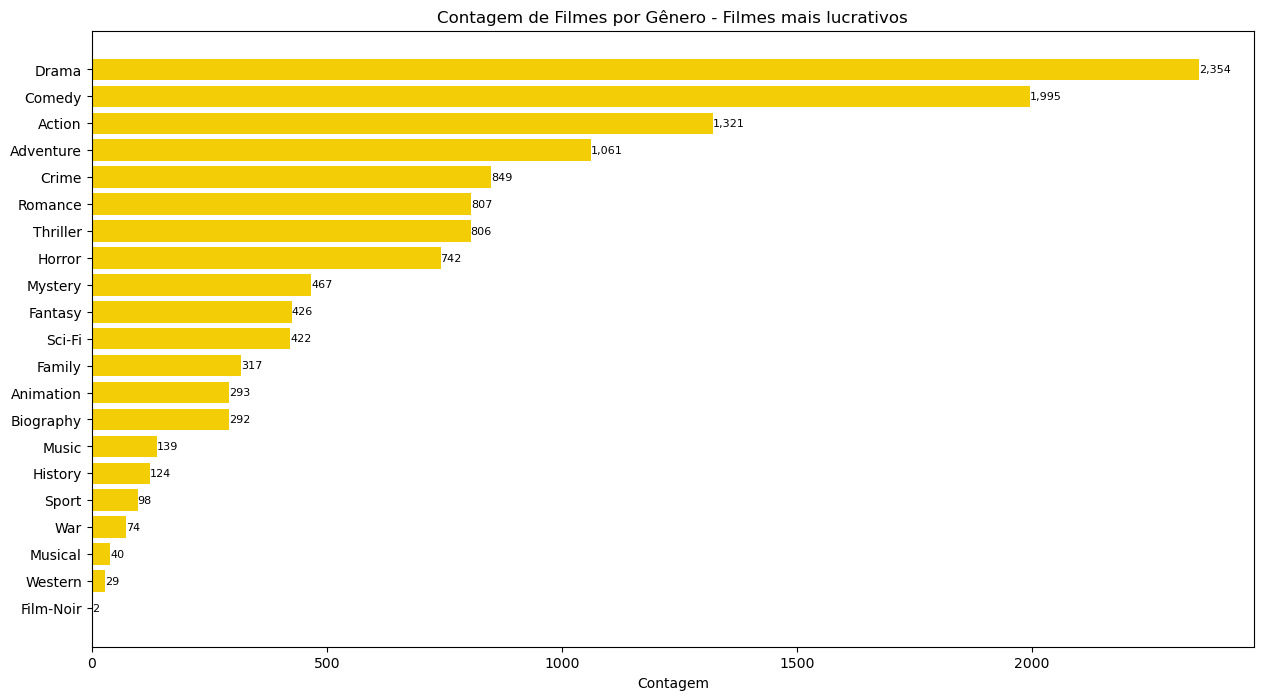

In [67]:
# Configurar o gráfico de barras
plt.figure(figsize=(15, 8))
bars = plt.barh(contagem_generos.index, contagem_generos.values, color="#F3CD05")

# Adicionar rótulos de dados (números) nas barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', fontsize=8)

plt.xlabel('Contagem')
plt.title('Contagem de Filmes por Gênero - Filmes mais lucrativos')
plt.gca().invert_yaxis()  # Inverte o eixo y para exibir o maior número no topo
plt.show()

- <strong>Top 10 produtoras:

In [68]:
# Agrupar por companhia/produtora e calcular a soma do faturamento e a média das avaliações
df_companhias = df_movies_final.groupby('produtoras').agg({
    'mundo_receita': 'sum',  
    'media_avaliacoes': 'mean'  
}).reset_index()

df_companhias = df_companhias.sort_values(by='mundo_receita', ascending=False).head(10)

display(df_companhias)


,produtoras,mundo_receita,media_avaliacoes
1738,Warner Bros.,"52,547,009,005.00",6.68
1708,Universal Pictures,"49,776,818,353.00",6.52
544,Columbia Pictures,"40,899,526,476.00",6.46
1336,Paramount Pictures,"40,223,630,447.00",6.53
1692,Twentieth Century Fox,"38,697,889,818.00",6.35
1733,Walt Disney Pictures,"35,229,123,208.00",6.56
1266,New Line Cinema,"17,434,507,627.00",6.32
1179,Marvel Studios,"15,064,930,368.00",7.60
676,DreamWorks,"12,592,332,095.00",6.75
677,DreamWorks Animation,"11,792,887,620.00",6.89


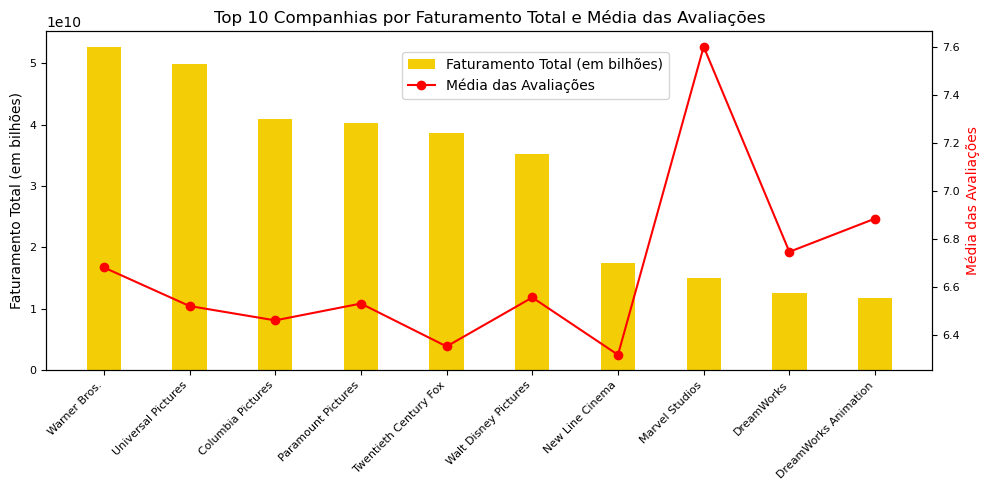

In [69]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Criar o gráfico de barras para o faturamento total
ax1.bar(df_companhias['produtoras'], df_companhias['mundo_receita'], color='#F3CD05', width=0.4, label='Faturamento Total (em bilhões)')
ax1.set_ylabel('Faturamento Total (em bilhões)')
ax1.set_xlabel('')
ax1.set_title('Top 10 Companhias por Faturamento Total e Média das Avaliações')

# Ajustar a rotação e o tamanho das letras no eixo x
ax1.set_xticklabels(df_companhias['produtoras'], rotation=45, ha='right', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)

# Criar o segundo eixo y para a média das avaliações
ax2 = ax1.twinx()
ax2.plot(df_companhias['produtoras'], df_companhias['media_avaliacoes'], color='r', marker='o', linestyle='-', label='Média das Avaliações')
ax2.set_ylabel('Média das Avaliações', color='r')
ax2.tick_params(axis='both', which='major', labelsize=8)

# Exibir as legendas
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.40, 0.9))

plt.show()


- <strong>Top 10 diretores:

In [70]:
df_diretores = df_movies_final.groupby('diretores').agg({
    'mundo_receita': 'sum',  
    'media_avaliacoes': 'mean'  
}).reset_index()

df_diretores = df_diretores.sort_values(by='mundo_receita', ascending=False).head(10)

display(df_diretores)  

,diretores,mundo_receita,media_avaliacoes
2251,Steven Spielberg,"10,499,026,583.00",7.33
158,"Anthony Russo, Joe Russo","6,844,542,844.00",7.58
1855,Peter Jackson,"6,568,807,817.00",7.94
1597,Michael Bay,"6,451,692,798.00",6.48
983,James Cameron,"6,185,441,282.00",7.96
574,David Yates,"5,044,302,972.00",7.18
414,Christopher Nolan,"4,817,173,767.00",8.24
960,J.J. Abrams,"4,653,989,459.00",7.28
1245,Jon Favreau,"4,348,727,274.00",6.89
2321,Tim Burton,"4,332,425,252.00",6.94


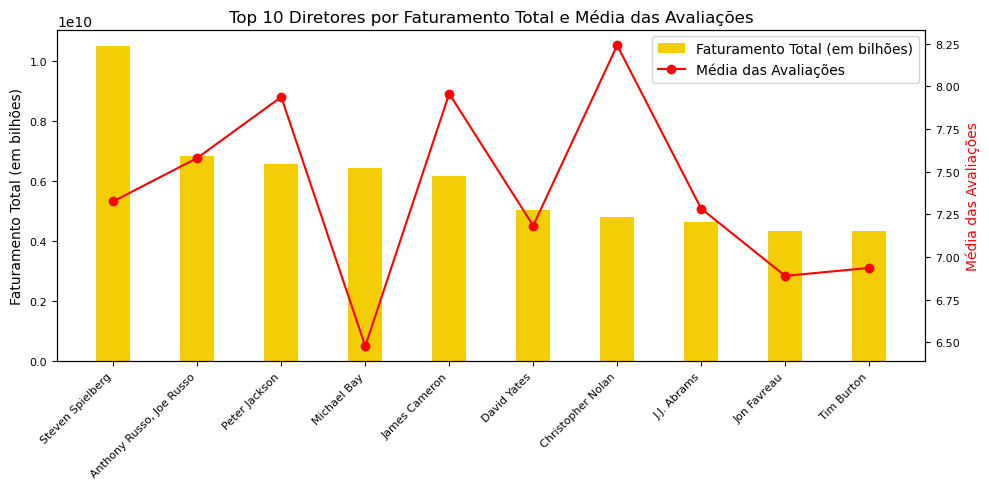

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Criar o gráfico de barras para o faturamento total
ax1.bar(df_diretores['diretores'], df_diretores['mundo_receita'], color='#F3CD05', width=0.4, label='Faturamento Total (em bilhões)')
ax1.set_ylabel('Faturamento Total (em bilhões)')
ax1.set_xlabel('')
ax1.set_title('Top 10 Diretores por Faturamento Total e Média das Avaliações')

# Ajustar a rotação e o tamanho das letras no eixo x
ax1.set_xticklabels(df_diretores['diretores'], rotation=45, ha='right', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)

# Criar o segundo eixo y para a média das avaliações
ax2 = ax1.twinx()
ax2.plot(df_diretores['diretores'], df_diretores['media_avaliacoes'], color='r', marker='o', linestyle='-', label='Média das Avaliações')
ax2.set_ylabel('Média das Avaliações', color = 'r')
ax2.tick_params(axis='both', which='major', labelsize=8)

# Exibir as legendas
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.65, 0.93))

plt.show()


- <strong>Top 10 escritores:

In [72]:
df_escritores = df_movies_final.groupby('escritores').agg({
    'mundo_receita': 'sum', 
    'media_avaliacoes': 'mean' 
}).reset_index()

df_escritores = df_escritores.sort_values(by='mundo_receita', ascending=False).head(10)

display(df_escritores)  

,escritores,mundo_receita,media_avaliacoes
692,"Christopher Markus, Stephen McFeely","7,587,475,481.00",7.41
1689,James Cameron,"5,075,609,059.00",7.77
712,"Cinco Paul, Ken Daurio","3,906,663,858.00",6.63
3844,"Ted Elliott, Terry Rossio","3,727,154,034.00",7.30
1279,"Fran Walsh, Philippa Boyens","3,587,375,000.00",7.36
2719,"Melissa Rosenberg, Stephenie Meyer","3,359,899,919.00",5.12
643,"Chris Morgan, Gary Scott Thompson","3,290,231,059.00",6.97
3744,"Steve Kloves, J.K. Rowling","3,172,956,119.00",7.80
1659,"J.R.R. Tolkien, Fran Walsh","2,981,432,817.00",8.90
2135,"Jonathan Nolan, Christopher Nolan","2,893,006,769.00",8.65


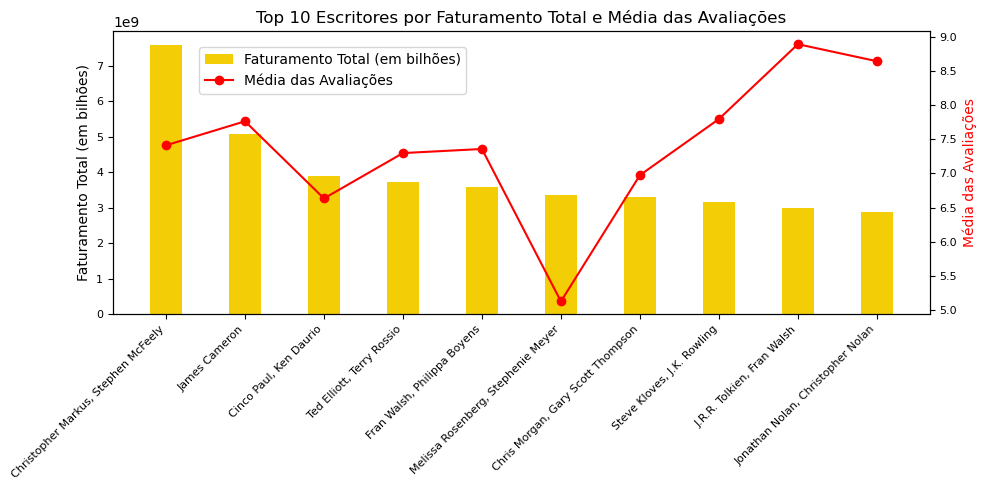

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Criar o gráfico de barras para o faturamento total
ax1.bar(df_escritores['escritores'], df_escritores['mundo_receita'], color='#F3CD05', width=0.4, label='Faturamento Total (em bilhões)')
ax1.set_ylabel('Faturamento Total (em bilhões)')
ax1.set_xlabel('')
ax1.set_title('Top 10 Escritores por Faturamento Total e Média das Avaliações')

# Ajustar a rotação e o tamanho das letras no eixo x
ax1.set_xticklabels(df_escritores['escritores'], rotation=45, ha='right', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)

# Criar o segundo eixo y para a média das avaliações
ax2 = ax1.twinx()
ax2.plot(df_escritores['escritores'], df_escritores['media_avaliacoes'], color='r', marker='o', linestyle='-', label='Média das Avaliações')
ax2.set_ylabel('Média das Avaliações', color = 'r')
ax2.tick_params(axis='both', which='major', labelsize=8)

# Exibir as legendas
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.2, 0.91))

plt.show()

## RELATÓRIO - ANÁLISE DE DADOS DO IMDB
----------------------------------------

**Introdução:**

Este relatório oferece uma análise dos dados do IMDb, com foco em insights estratégicos para cineastas, investidores e entusiastas do cinema. Mergulhamos nos elementos que impulsionam o sucesso de filmes, desde gêneros populares até o poder das franquias e aclamação da crítica.

**Gêneros e Duração:**

* **Drama, Documentário e Comédia:** São os gêneros mais frequentes, com medianas de avaliação que variam entre 6,5 e 7,0.
* **Duração:** Filmes com maior bilheteria possuem duração média de 144,90 minutos, enquanto os mais bem avaliados tendem a ser um pouco mais longos, com 153,50 minutos em média.

**Tendências dos Filmes de Alta Bilheteria:**

* **Grandes Orçamentos:** cenários grandiosos e elencos renomados, atrativos para o público em geral.
* **Gêneros Atraentes:** Drama, Comédia, ficção científica, fantasia, ação e aventura dominam as bilheterias, pois são populares entre públicos e geram grande expectativa.
* **Sequências e Franquias:** O reconhecimento da marca e a fidelidade do público impulsionam o sucesso de filmes como "Vingadores", "Star Wars" e "Jurassic World".

**Clássicos e Cult: Sucesso Além do Orçamento:**

* **Aclamação da Crítica e do Público:** Essa categoria abrange obras cult e clássicos que conquistaram corações e mentes.
* **Avaliações Elevadas:** A qualidade do roteiro, direção e atuação contribuem para a alta média de avaliações.
* **Orçamentos Variados:** Demonstram que o sucesso não depende apenas de altos investimentos. Exemplos como "The Godfather" e "Pulp Fiction" alcançaram grande sucesso com orçamentos relativamente baixos.

**Produtoras: Estratégias para o Sucesso:**

* **Warner Bros.:** Lidera em receita total, demonstrando maestria na produção de grandes sucessos comerciais.
* **DreamWorks Animation:** Foco em filmes de alta qualidade que conquistam o público, mesmo com menor receita total.
* **Walt Disney Pictures:** Encontra o equilíbrio entre aclamação da crítica e sucesso comercial, lançando filmes como "Toy Story" e "Rei Leão".

**Diretores: Maestros do Cinema:**

* **Bilheteria Mundial:** Steven Spielberg, Michael Bay, James Cameron e Jon Favreau se destacam como diretores de grandes blockbusters.
* **Aclamação da Crítica:** Christopher Nolan, Peter Jackson, David Yates e Tim Burton conquistam notas altas com seus filmes, mesmo que a bilheteria mundial não seja a maior.
* **Irmãos Russo:** Um caso intrigante. Anthony e Joe Russo possuem a segunda maior bilheteria mundial (com os filmes dos Vingadores), mas sua média de avaliação fica em 7,6, sugerindo que seus filmes, apesar do grande público, não recebem aclamação unânime da crítica.

**Roteiristas: Histórias que Conquistam:**

* **Christopher Markus e Stephen McFeely:** Lideram em bilheteria mundial com os roteiros dos filmes dos Vingadores, demonstrando o poder de histórias que conectam com o público em larga escala.
* **J.R.R. Tolkien e J.K. Rowling:** Adaptações de suas obras, como "O Senhor dos Anéis" e "Harry Potter", comprovam o apelo de histórias já estabelecidas.
* **James Cameron, Fran Walsh e Philippa Boyens:** Roteiristas de "Avatar", alcançam alto sucesso de bilheteria e crítica, provando que roteiros fortes podem gerar aclamação em ambos os campos.
* **Cinco Paul e Ken Daurio (franquia "Meu Malvado Favorito") e Ted Elliott & Terry Rossio ("Piratas do Caribe")**: Demonstram o potencial de adaptações bem-sucedidas para atrair o público.



# Questões aos invetidores:
-------------------------------

1. **Quem seria o Público-Alvo?**

2. **Quer um bom desempenho na médias das notas do público e da crítica ou um faturamento maior?**

2. **Marketing e Distribuição?**
   
- Estratégias de Marketing: Filmes que faturam mais frequentemente recebem investimentos pesados em marketing e têm campanhas promocionais mais agressivas, o que aumenta a visibilidade e atração do público.

- Distribuição Global: A disponibilidade do filme em vários mercados e o suporte de uma distribuição eficaz também são cruciais para o sucesso comercial, independentemente da qualidade percebida.

4. **Gênero e Temática:**
- Gênero do Filme: Alguns gêneros, como filmes de ação e comédia, tendem a ter um desempenho melhor nas bilheterias, independentemente das avaliações críticas.
- Temática e Apelo: Filmes que abordam temas universais ou populares podem atrair mais espectadores, mesmo que não sejam necessariamente considerados obras-primas pela crítica.

5. **Timing e Concorrência:**
- Época de Lançamento: A data de lançamento de um filme pode afetar significativamente seu desempenho nas bilheterias, especialmente se coincidir com períodos de férias ou lançamentos de grandes concorrentes.
- Concorrência Direta: A competição com outros filmes que estão sendo lançados ao mesmo tempo pode diminuir o público-alvo disponível para um determinado filme.


# Conclusão:
---------------------------------------------

Embora a qualidade cinematográfica (avaliação crítica) seja um fator importante para o sucesso de um filme, o faturamento e consequentemente o lucro dependem de uma combinação complexa de fatores, incluindo apelo ao público-alvo, estratégias de marketing, timing de lançamento e concorrência. 